NAIVE BAYES

*   Import Numpy module for mathematicsl calulations
*   Import Pandas for Data Pre-processing
*   Import Matplotlib for Data Visualisation





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split;

In [3]:
data = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
ans=pd.read_csv('gender_submission.csv')

Seperate the Target Variable from the fetaures

In [4]:
X = data.drop('Survived', axis=1)  # Features
y = data['Survived']  # Target variable
test_ans=ans['Survived']
#print(test_ans)

Assigning training and testing data to X_train,y_train,X_test,y_test variables

In [5]:
X_train = X
y_train=y
X_test=test
y_test=test_ans

In [19]:
class NaiveBayes:
    def __init__(self):           #constructor
        self.priors = {}          # Initialize priors dictionary
        self.posteriors = {}      # Initialize posterior dictionary

    def train(self, X_train, y_train):      
        # Calculate priors (class probabilities)
        self.priors = y_train.value_counts(normalize=True).to_dict()

        # Calculate posteriors (feature probabilities)
        for feature in X_train.columns:
            self.posteriors[feature] = {}

            for category in X_train[feature].unique():
                mask = X_train[feature] == category
                self.posteriors[feature][category] = y_train[mask].value_counts(normalize=True).to_dict()

    def predict(self, X_test):
      predictions = []
       # Iterate over each row in the test dataset
      for _, row in X_test.iterrows():
          likelihoods = {}
          # Calculate likelihood for each feature
          for category in self.priors.keys():
            likelihood = self.priors[category]
            for feature in X_test.columns:
              feature_value = row[feature]
              if feature_value in self.posteriors[feature]:
                likelihood *= self.posteriors[feature][feature_value].get(category, 0)
              else:
                likelihood = 0
            likelihoods[category] = likelihood
          # Select the category with maximum likelihood as the prediction
          prediction = max(likelihoods, key=likelihoods.get)
          predictions.append(prediction)
      return predictions

    
    def plot_priors(self):
      # Extract classes and probabilities from priors dictionary
      classes = list(self.priors.keys())
      probabilities = list(self.priors.values())
      
      # Create a bar plot for class probabilities (priors)
      plt.bar(classes, probabilities)
      plt.xlabel('Class')
      plt.ylabel('Probability')
      plt.title('Class Probabilities (Priors)')
      plt.show()

    





Accuracy: 1


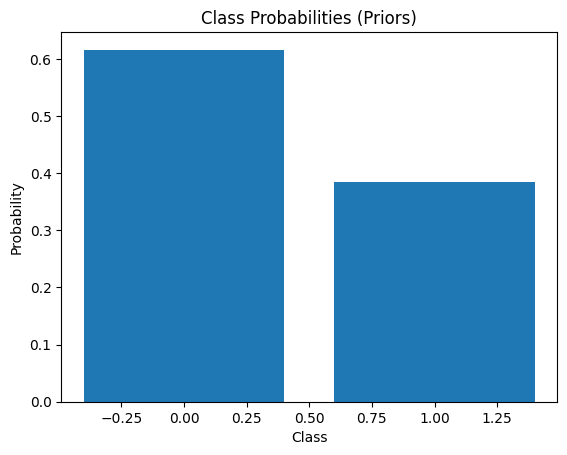

In [21]:
naive_bayes = NaiveBayes()  #creating an object for class Naive Bayes
naive_bayes.train(X_train, y_train) #calling function with X_train,y_train as parameters
predictions = naive_bayes.predict(X_test)  #predicting 

from sklearn.metrics import accuracy_score
#calculating the accuracy socre
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", round(accuracy))

naive_bayes.plot_priors()




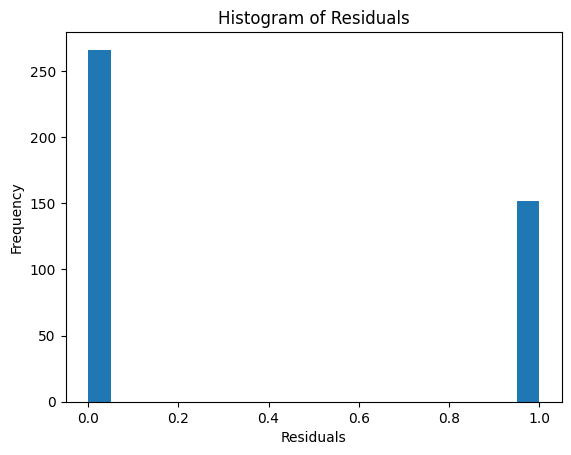

In [25]:
residuals = y_test - predictions      # Calculate residuals by subtracting predicted values from the actual values
plt.hist(residuals, bins=20)          # Create a histogram of residuals with 20 bins
plt.xlabel('Residuals')               # Set the label for the x-axis
plt.ylabel('Frequency')               # Set the label for the y-axis
plt.title('Histogram of Residuals')   # Set the title of the histogram
plt.show()                            # Display the histogram
